<a href="https://colab.research.google.com/github/danadino/Predicting-Hazardous-NEOs/blob/main/Predicting%20Hazardous%20NEOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')


In [10]:
df.shape

(338199, 9)

In [11]:
df.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486794,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867869,6.166118e+07,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [14]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [17]:
missing_values = df.isnull().sum()
missing_values

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [19]:
df.duplicated().sum()

0

In [20]:
# Handle missing values by filling with the mean for numerical columns
df['absolute_magnitude'].fillna(df['absolute_magnitude'].mean(), inplace=True)
df['estimated_diameter_min'].fillna(df['estimated_diameter_min'].mean(), inplace=True)
df['estimated_diameter_max'].fillna(df['estimated_diameter_max'].mean(), inplace=True)

<ipython-input-20-57848a177cef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['absolute_magnitude'].fillna(df['absolute_magnitude'].mean(), inplace=True)
<ipython-input-20-57848a177cef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [22]:
missing_values = df.isnull().sum()
missing_values


,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


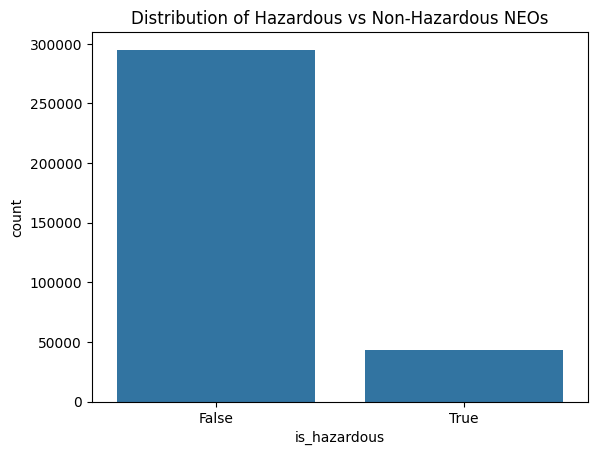

In [23]:
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()

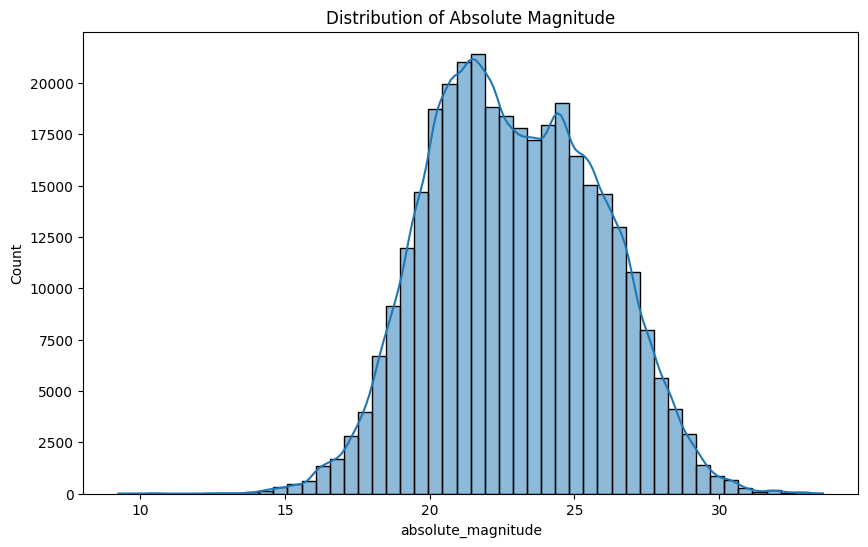

In [24]:
# Distribution of Absolute Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(df['absolute_magnitude'], bins=50, kde=True)
plt.title('Distribution of Absolute Magnitude')
plt.show()


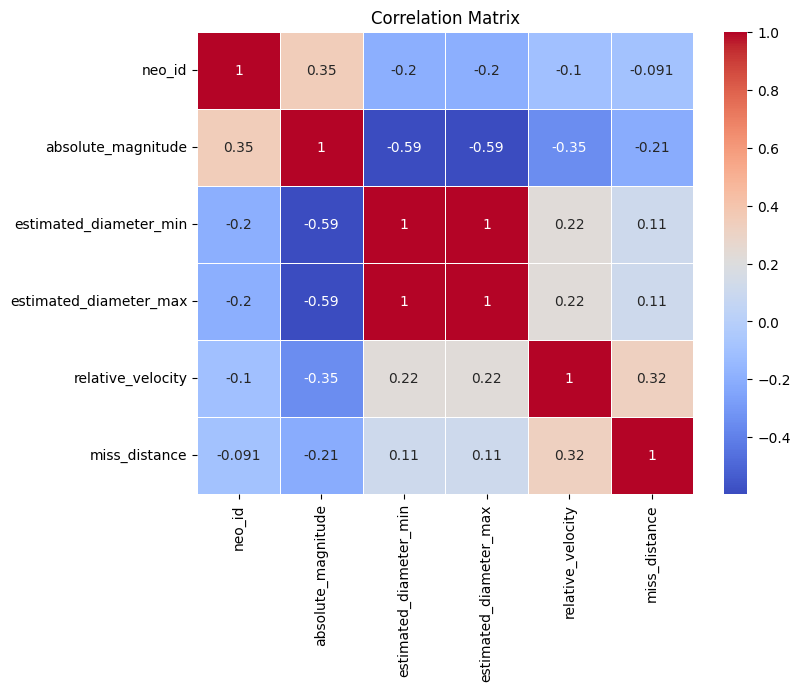

In [25]:

numeric_data = df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df['orbiting_body'] = label_encoder.fit_transform(df['orbiting_body'])

In [33]:
df.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [34]:
X = df.drop(['neo_id', 'name', 'is_hazardous'], axis=1)
y = df['is_hazardous']

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [40]:
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.88      0.72      0.79     88580
        True       0.76      0.90      0.83     88443

    accuracy                           0.81    177023
   macro avg       0.82      0.81      0.81    177023
weighted avg       0.82      0.81      0.81    177023

Confusion Matrix:
[[63375 25205]
 [ 8496 79947]]


In [41]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.8096236082316987

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     88580
        True       0.95      0.95      0.95     88443

    accuracy                           0.95    177023
   macro avg       0.95      0.95      0.95    177023
weighted avg       0.95      0.95      0.95    177023

Confusion Matrix:
[[83958  4622]
 [ 4457 83986]]


In [44]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.9487128791174029

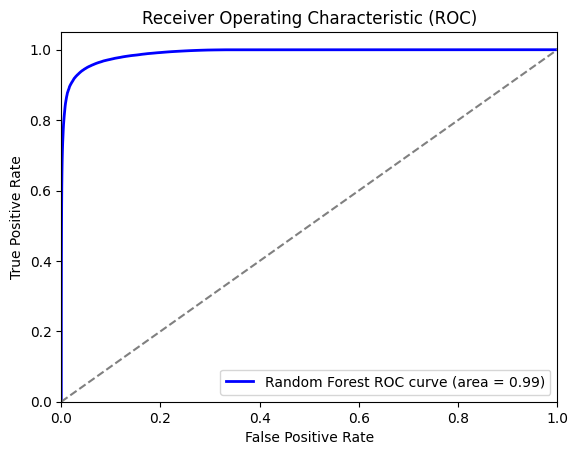

In [45]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()